# Is John Taylor's Data Cherry-Picked?
### By Nicole Haberer w/ help from Jaydip Patel, Vincent Chang, Ivy Wang, & Griffin Parr
### For MSBC 5030

In 2011 John Taylor published a post (1), claiming a strong correlation between increased government expenditure as a percentage of GDP and higher unemployment rates. There were several rebuttals to this claim (2,3 as examples) claiming that Taylor cherry-picked his dataset to support his personal opinion on the issue. 

Using the federal publication of this data (4) we will analyze this claim to determine if it is valid. 

1. https://economicsone.com/2011/01/14/higher-investment-best-way-to-reduce-unemployment-recent-experience-shows/
2. http://freakonomics.com/2011/03/30/how-to-spot-advocacy-science-john-taylor-edition/
3. https://krugman.blogs.nytimes.com/2011/03/30/whats-behind-low-investment/
4. https://fred.stlouisfed.org/

In [1]:
# Assemble Data from FRED

#Import data from FRED
gce <- read.csv("GCE.csv")
gdp <- read.csv("GDP.csv")
unrate <- read.csv("UNRATEnikki.csv")  

#combine gdp, gce, and unrate data into one table
alldata <- merge(gce, gdp, by = "DATE")
alldata <- merge(alldata, unrate, by = "DATE")

#convert DATE from factor to date
alldata$DATE <- as.Date(alldata$DATE)

#to replicate Taylor's time period, limit data to 1990Q1 to 2010Q3
alldata1990 <- subset(alldata, DATE >= "1990-01-01")
alldata2010 <- subset(alldata1990, DATE <= "2010-07-01")

#create new column to show government purchases as part of GDP
alldata2010$govasgdp <- (alldata2010$GCE / alldata2010$GDP)*100

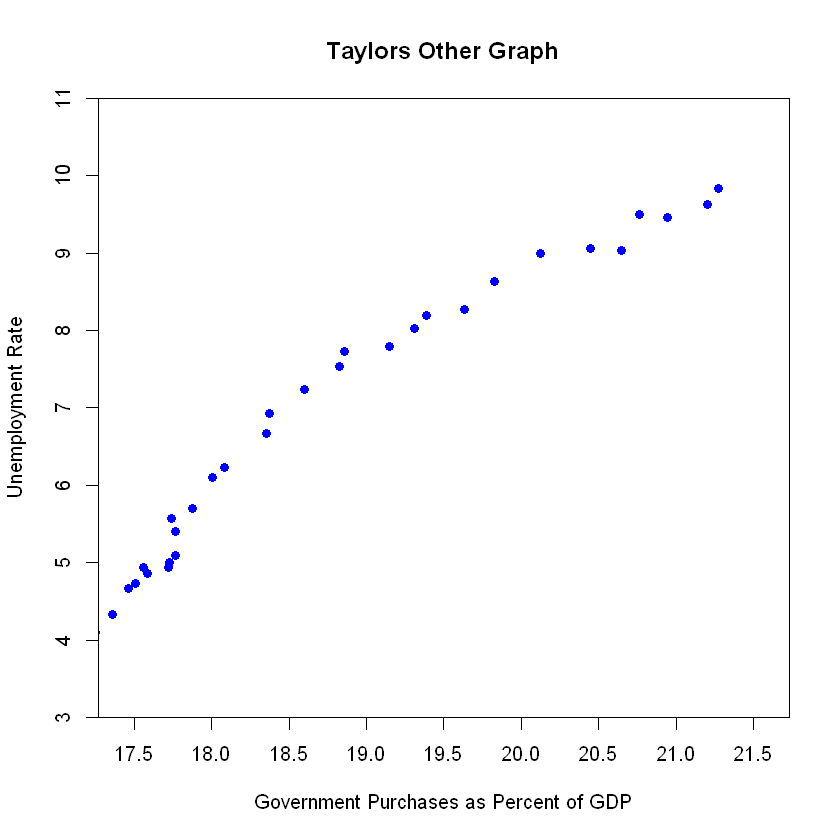

In [17]:
# Plot Taylor's Original Graph

plot(alldata2010$govasgdp, alldata2010$UNRATE, xlab = "Government Purchases as Percent of GDP",
     xlim = c(17.5,21.5), ylim = c(3,11),
     pch = 16,
     asp=.5,
     main = "Taylors Other Graph"
     ,xaxs = "i"
     ,yaxs = "i"
     ,xaxt = "n"
     ,ylab = "Unemployment Rate", col = "blue"
     )
axis(side = 1, at = 34:44/2) # x axis
axis(side = 2, at = 3:11 # y axis
)


This graph closely resembles Taylor's original and shows a strong positive correlation between government expenditures and unemployment.

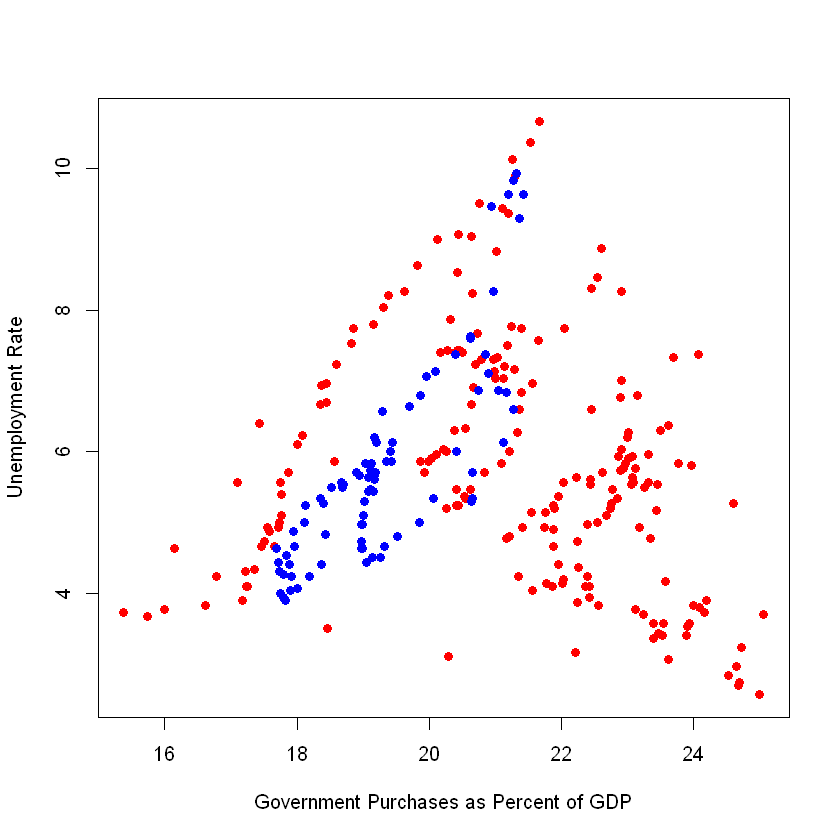

In [3]:
#3 Compare Taylor's graph to full dataset

#compare all data (red) to 1990-2010 data (blue)
alldata$govasgdp <- (alldata$GCE / alldata$GDP)*100

plot(alldata$govasgdp, alldata$UNRATE, xlab = "Government Purchases as Percent of GDP",
     ylab = "Unemployment Rate", col = "red", pch=16)
points(alldata2010$govasgdp, alldata2010$UNRATE, xlab = "Government Purchases as Percent of GDP",
     ylab = "Unemployment Rate", col = "blue", pch=16)

This graph shows Taylor’s correlation in blue compared to the full dataset in red. 

Hmm. This is a pretty different picture than what Taylor represented with his original data. 

I wonder how this correlation changes over time?

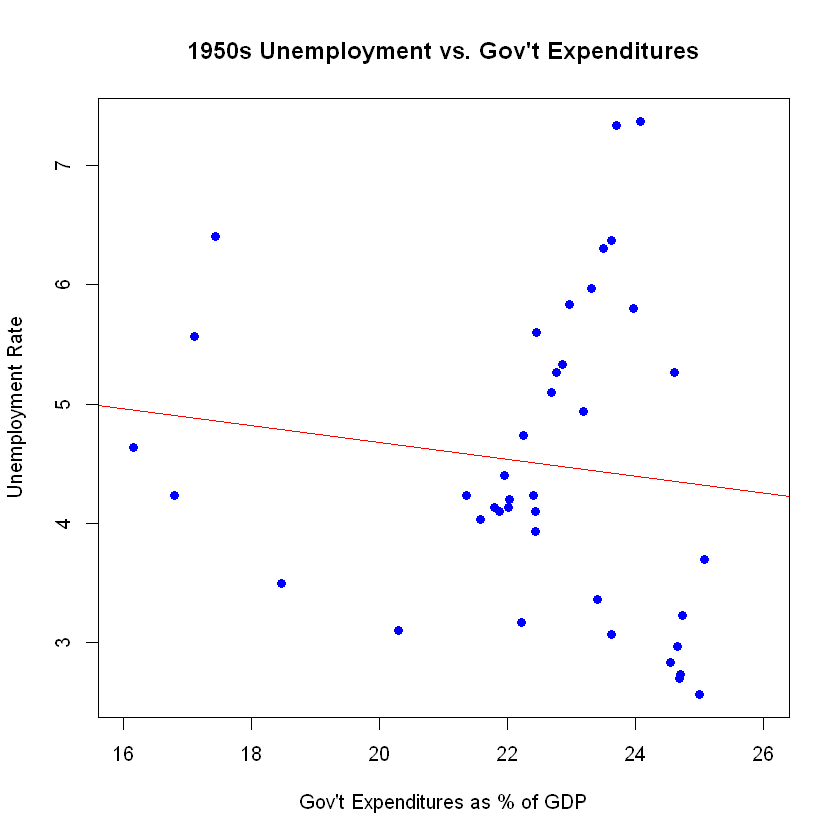

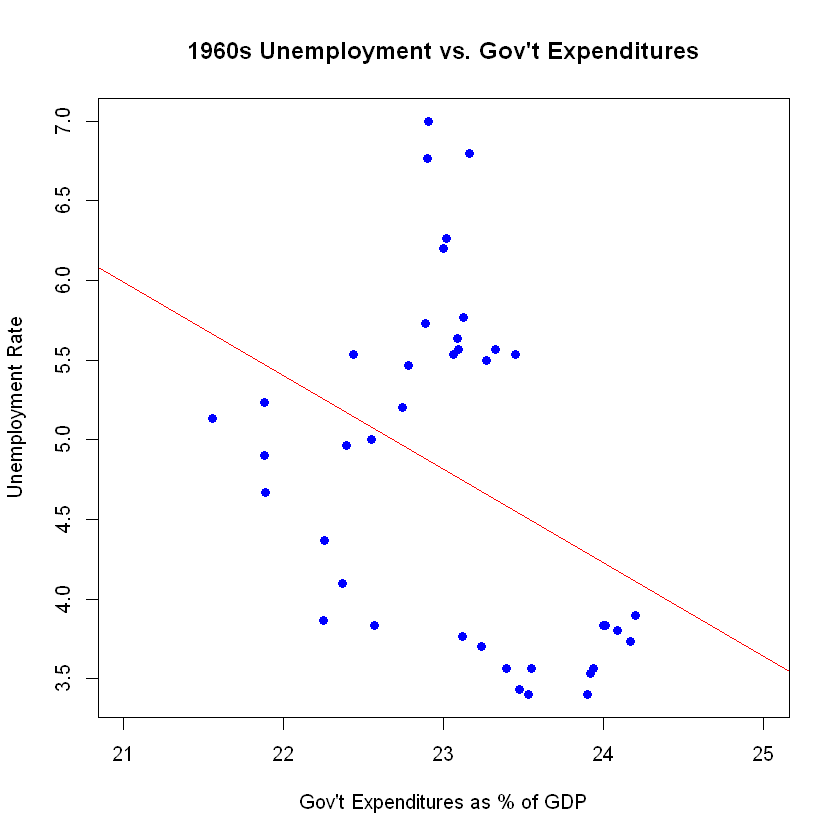

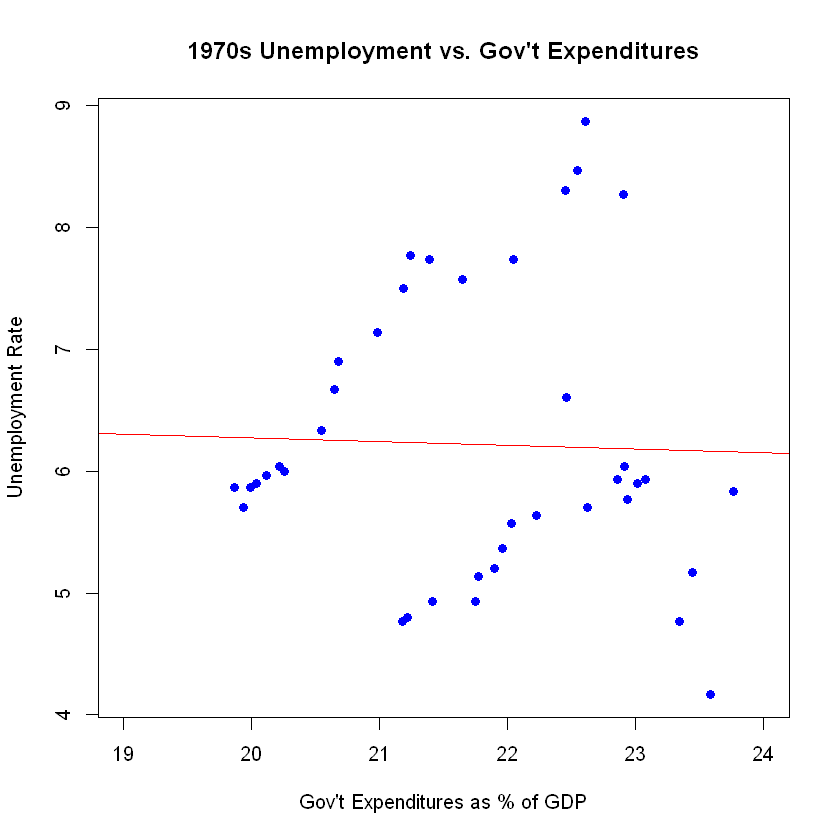

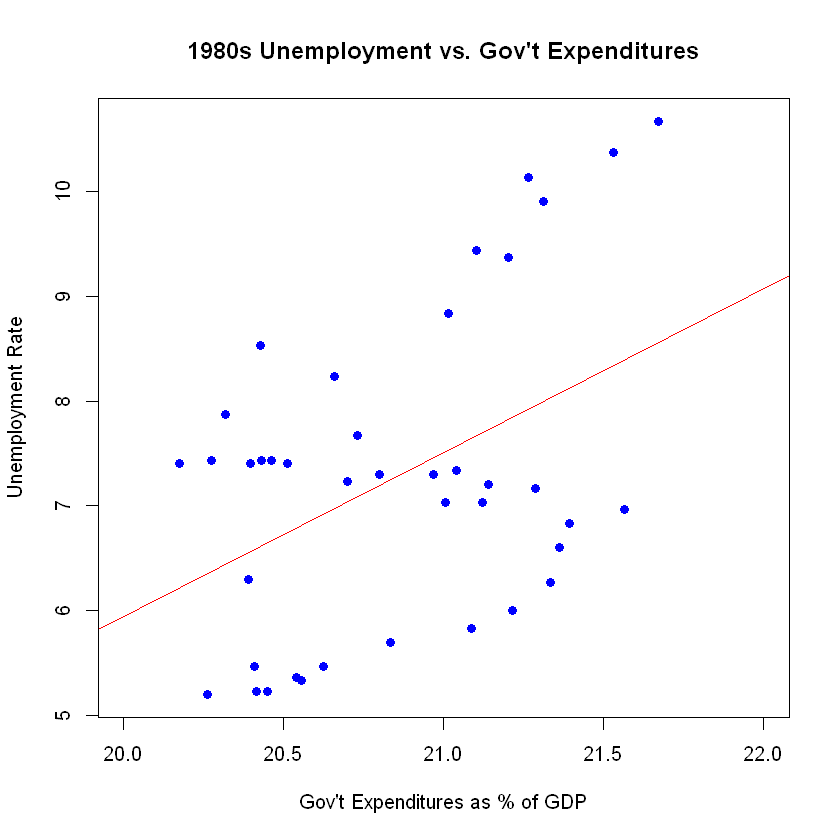

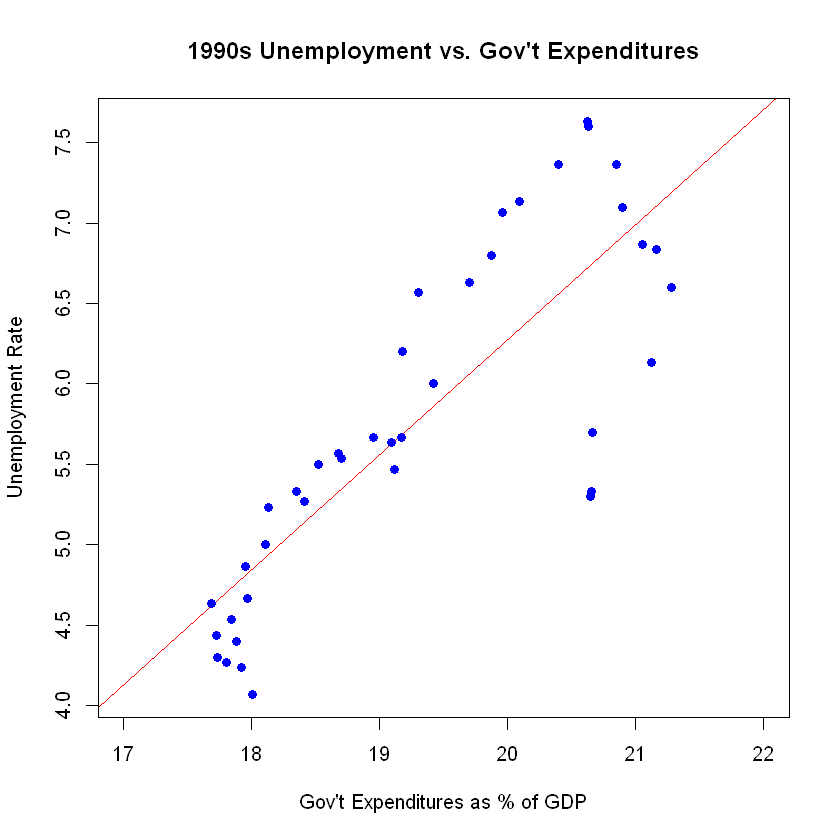

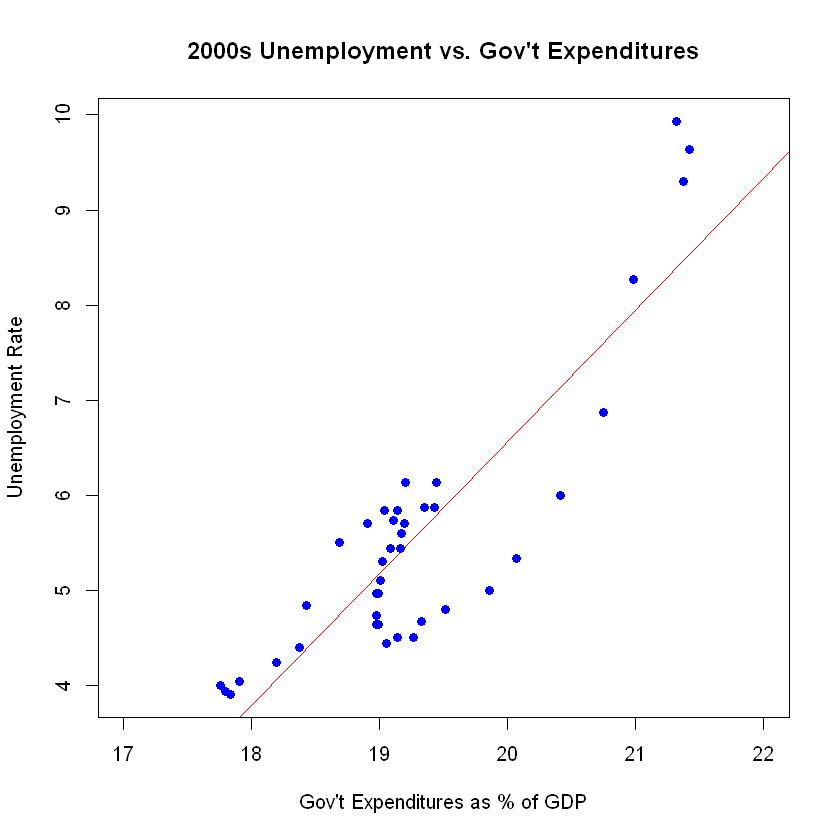

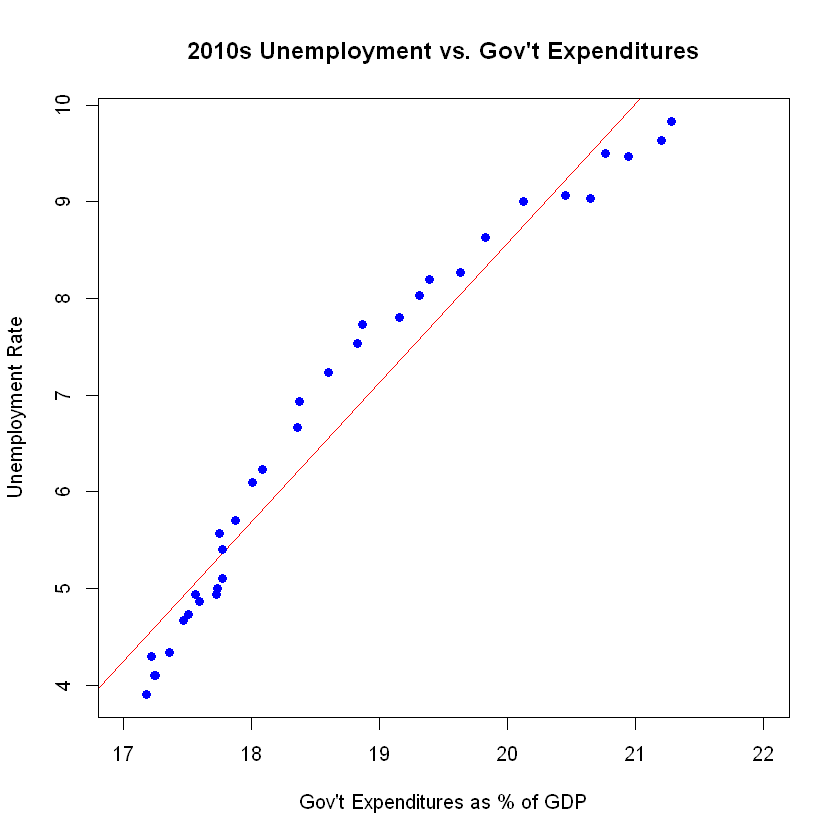

In [5]:
#Find a correlation for every decade between 1950-2018

#1950s
alldata1950 <- subset(alldata, DATE >= "1950-01-01" & DATE <= "1959-10-01")
#cor(alldata1950$UNRATE,alldata1950$govasgdp)
plot(alldata1950$govasgdp,alldata1950$UNRATE,abline(lm(alldata1950$UNRATE ~ alldata1950$govasgdp),col="red"),xlab = "Gov't Expenditures as % of GDP",
     ylab="Unemployment Rate", main="1950s Unemployment vs. Gov't Expenditures", pch=16,col="blue",xlim=c(16,26))

#1960s
alldata1960 <- subset(alldata, DATE >= "1960-01-01" & DATE <= "1969-10-01")
#cor(alldata1960$UNRATE,alldata1960$govasgdp)
plot(alldata1960$govasgdp,alldata1960$UNRATE,abline(lm(alldata1960$UNRATE ~ alldata1960$govasgdp),col="red"),xlab = "Gov't Expenditures as % of GDP",
     ylab="Unemployment Rate", main="1960s Unemployment vs. Gov't Expenditures", pch=16,col="blue",xlim=c(21,25))

#1970s
alldata1970 <- subset(alldata, DATE >= "1970-01-01" & DATE <= "1979-10-01")
#cor(alldata1970$UNRATE,alldata1970$govasgdp)
plot(alldata1970$govasgdp,alldata1970$UNRATE,abline(lm(alldata1970$UNRATE ~ alldata1970$govasgdp),col="red"),xlab = "Gov't Expenditures as % of GDP",
     ylab="Unemployment Rate", main="1970s Unemployment vs. Gov't Expenditures", pch=16,col="blue",xlim=c(19,24))
#1980s
alldata1980 <- subset(alldata, DATE >= "1980-01-01" & DATE <= "1989-10-01")
#cor(alldata1980$UNRATE,alldata1980$govasgdp)
plot(alldata1980$govasgdp,alldata1980$UNRATE,abline(lm(alldata1980$UNRATE ~ alldata1980$govasgdp),col="red"),xlab = "Gov't Expenditures as % of GDP",
     ylab="Unemployment Rate", main="1980s Unemployment vs. Gov't Expenditures", pch=16,col="blue",xlim=c(20,22))

#1990s
alldata1990 <- subset(alldata, DATE >= "1990-01-01" & DATE <= "1999-10-01")
#cor(alldata1990$UNRATE,alldata1990$govasgdp)
plot(alldata1990$govasgdp,alldata1990$UNRATE,abline(lm(alldata1990$UNRATE ~ alldata1990$govasgdp),col="red"),xlab = "Gov't Expenditures as % of GDP",
     ylab="Unemployment Rate", main="1990s Unemployment vs. Gov't Expenditures", pch=16,col="blue",xlim=c(17,22))

#2000s
alldata2000 <- subset(alldata, DATE >= "2000-01-01" & DATE <= "2009-10-01")
#cor(alldata2000$UNRATE,alldata2000$govasgdp)
plot(alldata2000$govasgdp,alldata2000$UNRATE,abline(lm(alldata2000$UNRATE ~ alldata2000$govasgdp),col="red"),xlab = "Gov't Expenditures as % of GDP",
     ylab="Unemployment Rate", main="2000s Unemployment vs. Gov't Expenditures", pch=16,col="blue",xlim=c(17,22))

#2010s
alldata2010 <- subset(alldata, DATE >= "2010-01-01" & DATE <= "2018-04-01")
#cor(alldata2010$UNRATE,alldata2010$govasgdp)
plot(alldata2010$govasgdp,alldata2010$UNRATE,abline(lm(alldata2010$UNRATE ~ alldata2010$govasgdp),col="red"),xlab = "Gov't Expenditures as % of GDP",
     ylab="Unemployment Rate", main="2010s Unemployment vs. Gov't Expenditures", pch=16,col="blue",xlim=c(17,22))


Wow. The correlation between these variables for each decade is drastically different. 

Let's try looking at this differently.

### Statistical Experiment :
### Can we create strong correlations between data when the variables are purely random?

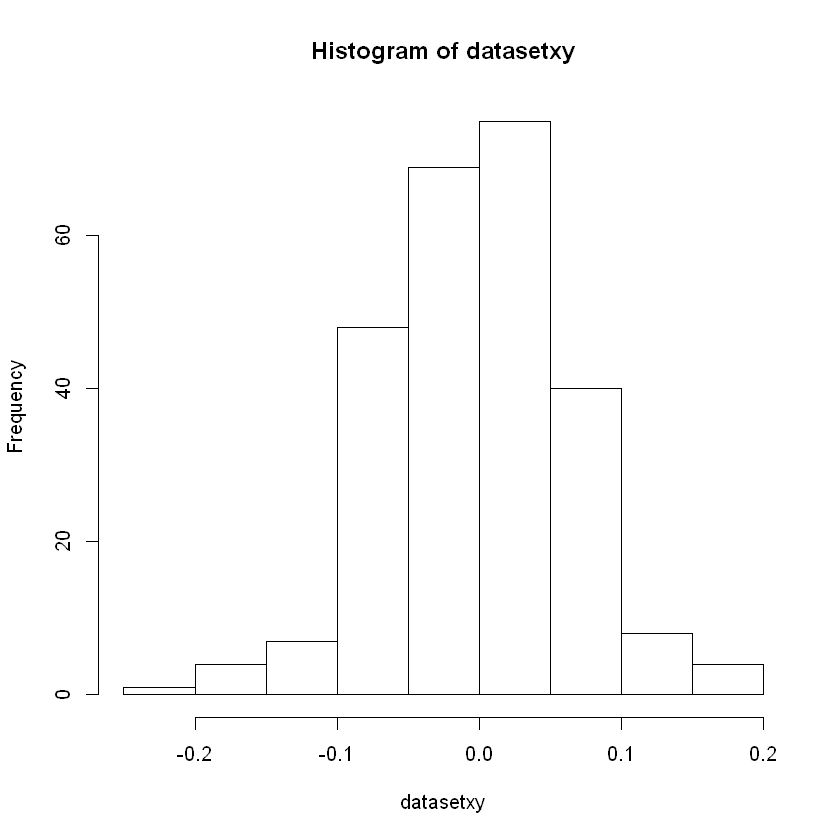

In [8]:
# Create 2 random variables and divide into full and cherry-picked sets of data

#generate two uncorrelated variables x and y (from Normal distribution) over a time series of 256 quarters
x <- rnorm(256, mean=0, sd=1)
y <- rnorm(256, mean=0, sd=1)
xycor <- cor(x,y)

datasetxy <- rep(NA, 100)
for (i in 1:256){
  x <- rnorm(256, mean=0, sd=1)
  y <- rnorm(256, mean=0, sd=1)
  datasetxy[i]= cor(x,y)
}
hist(datasetxy)

As expected, a histogram of the correlation between two random variables is centered around a mean of zero and normally distributed. 

[1] "Full Correlation"


[1] 0.07380976

[1] "Max Correlation"


[1] 0.08034173

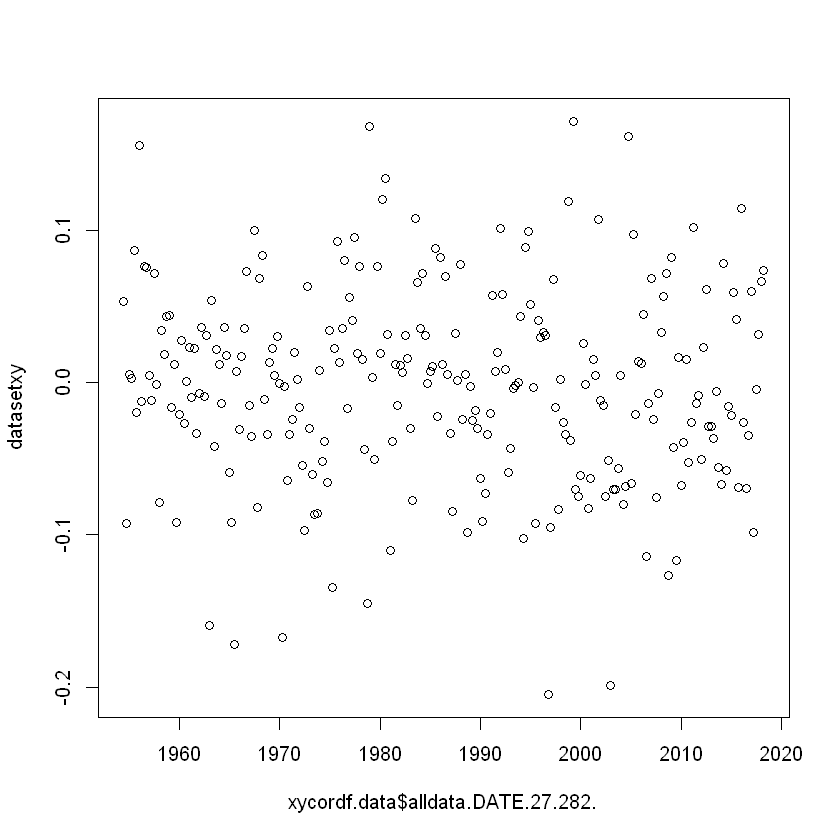

In [11]:
#let's plot these correlations against time-frame 1954 - 2018
xycordf.data <- data.frame(alldata$DATE[27:282], datasetxy)
plot(xycordf.data$alldata.DATE.27.282., datasetxy)


#5.b find the correlation over last 60 quarters, then 61, 62, etc. to find out the variability in the data
xy60 <- cor(x[196:256], y[196:256])

xyfulllist <- rep(NA, 196)
placeholderx <- 0
placeholdery <- 0
for (i in 1:196) {
  placeholderx <- 197 - i 
  placeholdery <- 197 - i
  xyfulllist[i] <- cor(x[placeholderx:256], y[placeholdery:256])
}

print ("Full Correlation")
cor(x,y)
print ("Max Correlation")
max(xyfulllist)

This scatterplot clearly shows there is no actual correlation in this data.

In [20]:
# Now iterate through this data 1000 times to create a large dataset to pull your cherry-picked data from
orig1000 <- NA
cherr1000 <- NA

for (i in 1:1000){
  
  xyfulllist1 <- NA
  
  placeholderx1 <- 0
  placeholdery1 <- 0
  
  x2 <- rnorm(256, mean=0, sd=1)
  y2 <- rnorm(256, mean=0, sd=1)
  
  orig1000[i] <- cor(x2,y2)
  
  for (k in 1:196) {
    x1 <- rnorm(256, mean=0, sd=1)
    y1 <- rnorm(256, mean=0, sd=1)
    
    placeholderx1 <- 197 - k 
    placeholdery1<- 197 - k
    xyfulllist1[k] <- cor(x1[placeholderx1:256], y1[placeholdery1:256])
  }
  cherr1000[i] <- max(xyfulllist1)
}


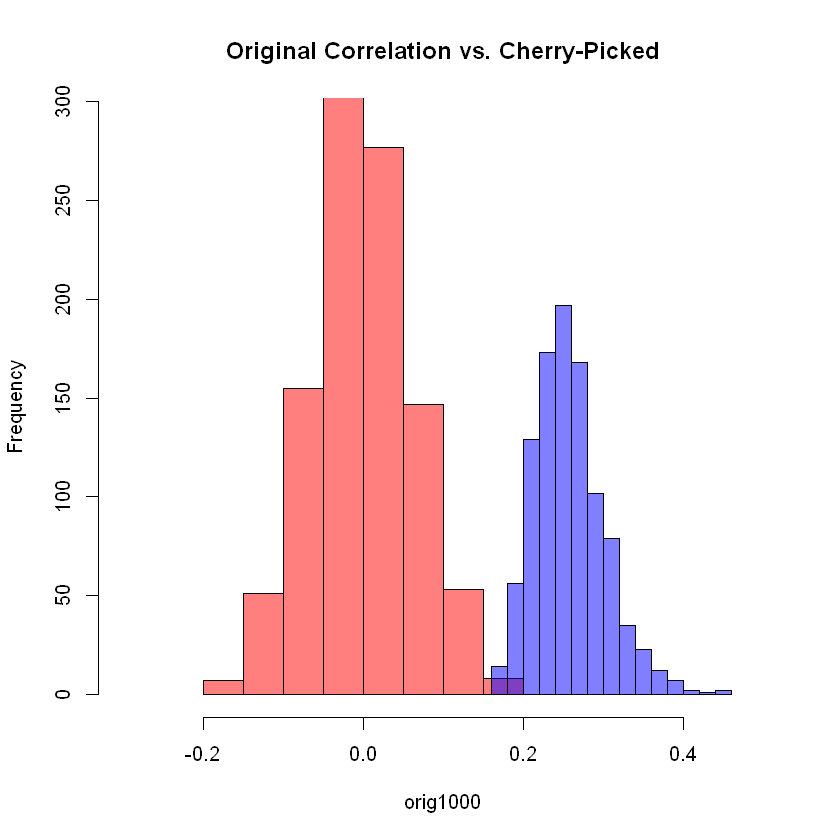

In [22]:
#plot cherry picked vs. original
hist(orig1000, col=rgb(1,0,0,0.5),xlim=c(-.3,.5), ylim=c(0,290), main="Original Correlation vs. Cherry-Picked")
hist(cherr1000, col=rgb(0,0,1,0.5), add=T)


After iterating through the full dataset of correlations between random variables and comparing it to the cherry-picked data, it is clear how much of an impact this technique can have on the final results. The full data is centered around a mean of 0 while the cherry-picked data is centered around a mean of .25 and has very little overlap with the original data. 

In [23]:
#t test to compare two datasets
t.test(cherr1000, orig1000)


	Welch Two Sample t-test

data:  cherr1000 and orig1000
t = 106.26, df = 1776.2, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.2540788 0.2636349
sample estimates:
   mean of x    mean of y 
 0.257838883 -0.001017959 


According to the t-test between the full data set and cherry-picked data, the p-value indicates the two datasets are statistically significant at the 5% level. A high t-value of 102 indicates that the cherry-picked sample is 102 standard errors above the full dataset mean.

In [24]:
#compare cherry-picked data to Taylor's correlation
t.test(cherr1000, mu=0.8242042)


	One Sample t-test

data:  cherr1000
t = -408.87, df = 999, p-value < 2.2e-16
alternative hypothesis: true mean is not equal to 0.8242042
95 percent confidence interval:
 0.2551207 0.2605571
sample estimates:
mean of x 
0.2578389 


According to the t-test between the cherry-picked data and Taylor’s correlation of 0.8242042, the p-value indicates these results are statistically significant and the t-value of -382 indicates that the cherry-picked data is 382 standard errors below Taylor’s strong correlation. 

#### Conclusion:
After running a cherry-picking data experiment on two purely random variables, we must reject our null hypothesis that Taylor’s data is cherry-picked using a similar method. The odds of finding such a strong correlation are just too low to be reasonably plausible. A correlation between his original data points certainly exists to some extent.

However, just because we are ruling out this version of cherry-picking data in Taylor’s analysis does not mean we can rule out other forms of bias. Taylor chose a convenient time period to demonstrate his point without explaining that this small sample did not represent the correlation over time for all of the data available. Indeed, economics is a complex issue involving many moving pieces such as action taken by the federal reserve, the politics of the administration currently in power, and the overall strength of the economy at the time which makes it hard to conclude a direct sole correlation between two variables, let alone at such a powerful magnitude.
